In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
d = pd.read_csv("../input/mushroom-classification/mushrooms.csv")

In [4]:
d.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df = d.copy()

In [7]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in df.columns:
    df[i] = l.fit_transform(df[i])

In [8]:
df.corrwith(df["class"])

d:\projects\boosting\.venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\projects\boosting\.venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


class                       1.000000
cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-root                 -0.379361
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-type                        NaN
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
dtype: float64

In [9]:
df = df.drop(columns="veil-type",axis=1)

<Axes: ylabel='count'>

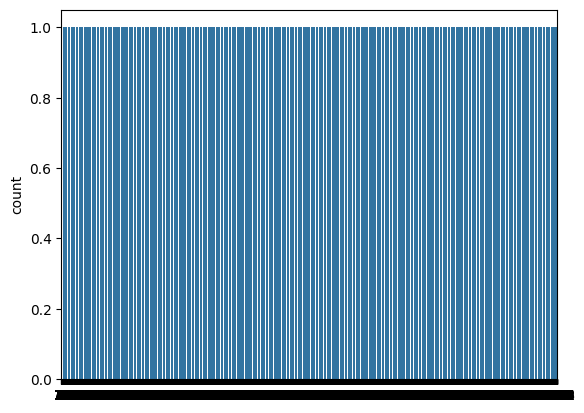

In [10]:
sns.countplot(df["class"])

In [11]:
x = df.drop(columns="class",axis=1)
y = df["class"]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [14]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print("accuracy is (%) =",accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

accuracy is (%) = 100.0
